In [1]:
import flory
import numpy as np
import matplotlib.pyplot as plt
import mpltern

chis = [[0,4,2],[4,0,2],[2,2,0]]
num_comp = 3

np.savetxt('example_1/chis.txt', chis)

In [2]:
n_ticks = 40
ticks = np.linspace(0,1,n_ticks)
# xx,yy = np.meshgrid(ticks, ticks)
nPhases_to_phis = {i+1:[] for i in range(num_comp)}
# for i in range(n_ticks):
#     for j in range(n_ticks):
for x in ticks:
    for y in ticks:
        # if (xx[i,j] + yy[i,j] <= 1):
        if (x + y <= 1):
            # phi_0.append(xx[i,j])
            # phi_1.append(yy[i,j])
            # phi_2.append(1 - xx[i,j] - yy[i,j])
            phi_means = np.array([x,y,1 - x - y])
            # phi_means = np.array([xx[i,j],yy[i,j],1 - xx[i,j] - yy[i,j]])
            print("input concentrations: ", phi_means)        
            fh = flory.FloryHuggins(num_comp, chis)
            # create a ensemble
            ensemble = flory.CanonicalEnsemble(num_comp, phi_means)
            # construct a finder from interaction, entropy and ensemble
            finder = flory.CoexistingPhasesFinder(fh.interaction, fh.entropy, ensemble,progress=False)
            # obtain phases by clustering compartments 
            phases = finder.run().get_clusters().sort().normalize()
            print("phase volumes: ",phases.volumes)
            print("phase compositions: ",phases.fractions)
            # n_phases.append(len(phases.volumes))
            nPhases_to_phis[len(phases.volumes)].append(phi_means)
# save the data:

for n_phases, phis in nPhases_to_phis.items():
    np.savetxt('example_1/{}_phases.csv'.format(n_phases), np.array(phis))

# ax = plt.subplot(projection='ternary')
# color_map = {1:'r',2:'g',3:'b'}
# ax.scatter(phi_0,phi_1,phi_2, c = [color_map[n] for n in n_phases])
# plt.show()

input concentrations:  [0. 0. 1.]
phase volumes:  [1.]
phase compositions:  [[0. 0. 1.]]
input concentrations:  [0.         0.02564103 0.97435897]
phase volumes:  [1.]
phase compositions:  [[0.         0.02564103 0.97435897]]
input concentrations:  [0.         0.05128205 0.94871795]
phase volumes:  [1.]
phase compositions:  [[0.         0.05128205 0.94871795]]
input concentrations:  [0.         0.07692308 0.92307692]
phase volumes:  [1.]
phase compositions:  [[0.         0.07692308 0.92307692]]
input concentrations:  [0.        0.1025641 0.8974359]
phase volumes:  [1.]
phase compositions:  [[0.        0.1025641 0.8974359]]
input concentrations:  [0.         0.12820513 0.87179487]
phase volumes:  [1.]
phase compositions:  [[0.         0.12820513 0.87179487]]
input concentrations:  [0.         0.15384615 0.84615385]
phase volumes:  [1.]
phase compositions:  [[0.         0.15384615 0.84615385]]
input concentrations:  [0.         0.17948718 0.82051282]
phase volumes:  [1.]
phase compositio

[0.04   0.0675 0.095  0.1225 0.15  ]
input concentrations:  [0.86 0.1  0.04]
phase volumes:  [0.91708105 0.08291895]
phase compositions:  [[0.93554695 0.02445305 0.04      ]
 [0.0244531  0.93554689 0.04000004]]
input concentrations:  [0.8325 0.1    0.0675]
phase volumes:  [0.91686134 0.08313866]
phase compositions:  [[0.90554475 0.02695526 0.0675    ]
 [0.02695529 0.90554468 0.06750004]]
input concentrations:  [0.805 0.1   0.095]
phase volumes:  [0.91690139 0.08309861]
phase compositions:  [[0.87526186 0.02973812 0.09500002]
 [0.02973797 0.87526225 0.09499974]]
input concentrations:  [0.7775 0.1    0.1225]
phase volumes:  [0.9172728 0.0827272]
phase compositions:  [[0.84465955 0.0328404  0.12250005]
 [0.03284011 0.84466043 0.12249941]]
input concentrations:  [0.75 0.1  0.15]
phase volumes:  [0.9180698 0.0819302]
phase compositions:  [[0.81369117 0.03630866 0.15000018]
 [0.03630783 0.81369405 0.14999804]]
input concentrations:  [0.66 0.3  0.04]
phase volumes:  [0.69756484 0.30243516]
ph

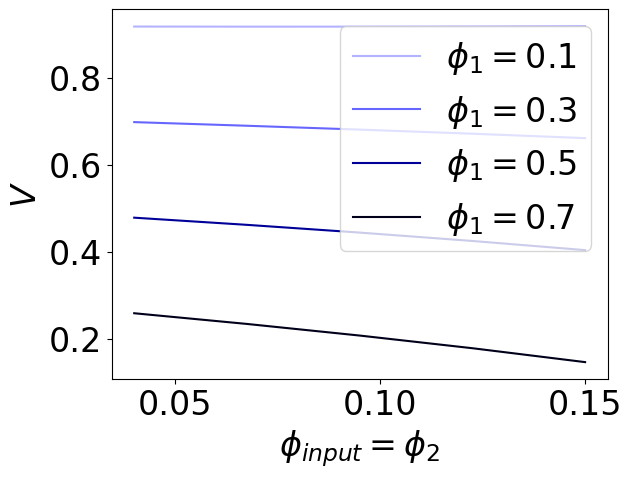

In [9]:
# case 1
import flory
import numpy as np
import matplotlib.pyplot as plt
import mpltern
fontsz = 24
line_color_map = {
    3: '#00001a',
    2:'#000099',
    1:'#6666ff',
    0:'#b3b3ff'}
num_comp = 3
phi_h = [0.1,0.3,0.5,0.7]
phi_in_min = 0.04
phi_in_max = 0.15
phi_in_vals = np.linspace(phi_in_min,phi_in_max,5)
print(phi_in_vals)
counter = 0
for i, phi_1 in enumerate(phi_h):
    V = []
    phi_ins = []
    for phi_2 in phi_in_vals:
        if (phi_1 + phi_2 <1):
            phi_0 = 1 - phi_1 - phi_2
            phi_means = np.array([phi_0,phi_1,phi_2])
            print("input concentrations: ", phi_means)        
            fh = flory.FloryHuggins(num_comp, chis)
            # create a ensemble
            ensemble = flory.CanonicalEnsemble(num_comp, phi_means)
            # construct a finder from interaction, entropy and ensemble
            finder = flory.CoexistingPhasesFinder(fh.interaction, fh.entropy, ensemble,progress=False)
            # obtain phases by clustering compartments 
            phases = finder.run().get_clusters().sort().normalize()
            print("phase volumes: ",phases.volumes)
            print("phase compositions: ",phases.fractions)
            if (len(phases.volumes) == 2):
                V.append(phases.volumes[0])
                # V.append(phases.fractions[1,2])
                phi_ins.append(phi_2)
    plt.plot(phi_ins,V,label = r'$\phi_1 = {}$'.format(phi_1),color = line_color_map[i])
plt.xlabel(r'$\phi_{input} = \phi_2$',fontsize = fontsz)
plt.ylabel(r'$V$',fontsize = fontsz)
plt.legend(fontsize = fontsz,loc = 'upper right')
plt.tick_params(axis='both', which='major', labelsize = fontsz)


[0.05       0.05526316 0.06052632 0.06578947 0.07105263 0.07631579
 0.08157895 0.08684211 0.09210526 0.09736842 0.10263158 0.10789474
 0.11315789 0.11842105 0.12368421 0.12894737 0.13421053 0.13947368
 0.14473684 0.15      ]
input concentrations:  [0.53 0.05 0.42]
phase volumes:  [0.58265471 0.41734529]
phase compositions:  [[0.61140763 0.03939825 0.34919413]
 [0.41634702 0.06480107 0.5188519 ]]
input concentrations:  [0.52473684 0.05526316 0.42      ]
phase volumes:  [0.5895267 0.4104733]
phase compositions:  [[0.61537377 0.04207682 0.34254937]
 [0.394563   0.07420153 0.53123552]]
input concentrations:  [0.51947368 0.06052632 0.42      ]
phase volumes:  [0.55342881 0.44657119]
phase compositions:  [[0.62593059 0.04359449 0.33047486]
 [0.3875433  0.08150967 0.53094712]]
input concentrations:  [0.51421053 0.06578947 0.42      ]
phase volumes:  [0.5471361 0.4528639]
phase compositions:  [[0.6311318  0.04548457 0.32338354]
 [0.37294989 0.09032123 0.536729  ]]
input concentrations:  [0.508

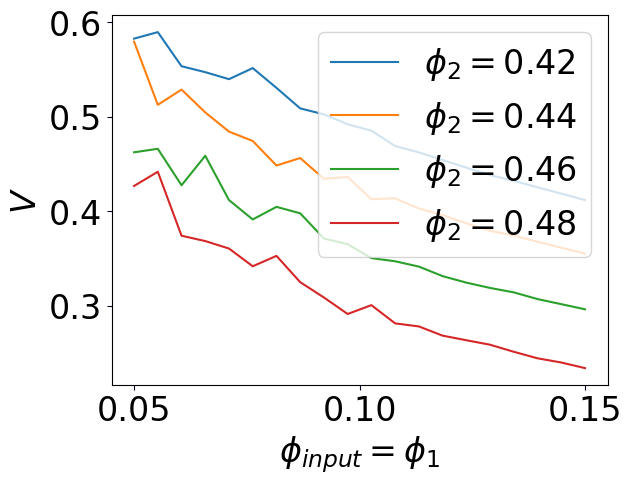

In [3]:
#case 2
import flory
import numpy as np
import matplotlib.pyplot as plt
import mpltern
import os
from mpltern.datasets import get_triangular_grid
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
line_color_map = {
    3: '#00001a',
    2:'#000099',
    1:'#6666ff',
    0:'#b3b3ff'}
fontsz = 24
num_comp = 3
phi_h = [0.42,0.44,0.46,0.48]
phi_in_min = 0.05
phi_in_max = 0.15
phi_in_vals = np.linspace(phi_in_min,phi_in_max,20)
print(phi_in_vals)
counter = 0
for i, phi_2 in enumerate(phi_h):
    V = []
    phi_ins = []
    for phi_1 in phi_in_vals:
        if (phi_1 + phi_2 <1):
            phi_0 = 1 - phi_1 - phi_2
            phi_means = np.array([phi_0,phi_1,phi_2])
            print("input concentrations: ", phi_means)        
            fh = flory.FloryHuggins(num_comp, chis)
            # create a ensemble
            ensemble = flory.CanonicalEnsemble(num_comp, phi_means)
            # construct a finder from interaction, entropy and ensemble
            finder = flory.CoexistingPhasesFinder(fh.interaction, fh.entropy, ensemble,progress=False)
            # obtain phases by clustering compartments 
            phases = finder.run().get_clusters().sort().normalize()
            print("phase volumes: ",phases.volumes)
            print("phase compositions: ",phases.fractions)
            if (len(phases.volumes) == 2):
                V.append(phases.volumes[0])
                # V.append(phases.fractions[1,2])
                phi_ins.append(phi_1)
    plt.plot(phi_ins,V,label = r'$\phi_2 = {}$'.format(phi_2))
plt.xlabel(r'$\phi_{input} = \phi_1$',fontsize = fontsz)
plt.ylabel(r'$V$',fontsize=fontsz)

plt.legend(fontsize = fontsz,loc = 'upper right')
plt.tick_params(axis='both', which='major', labelsize = fontsz,color = line_color_map[i])


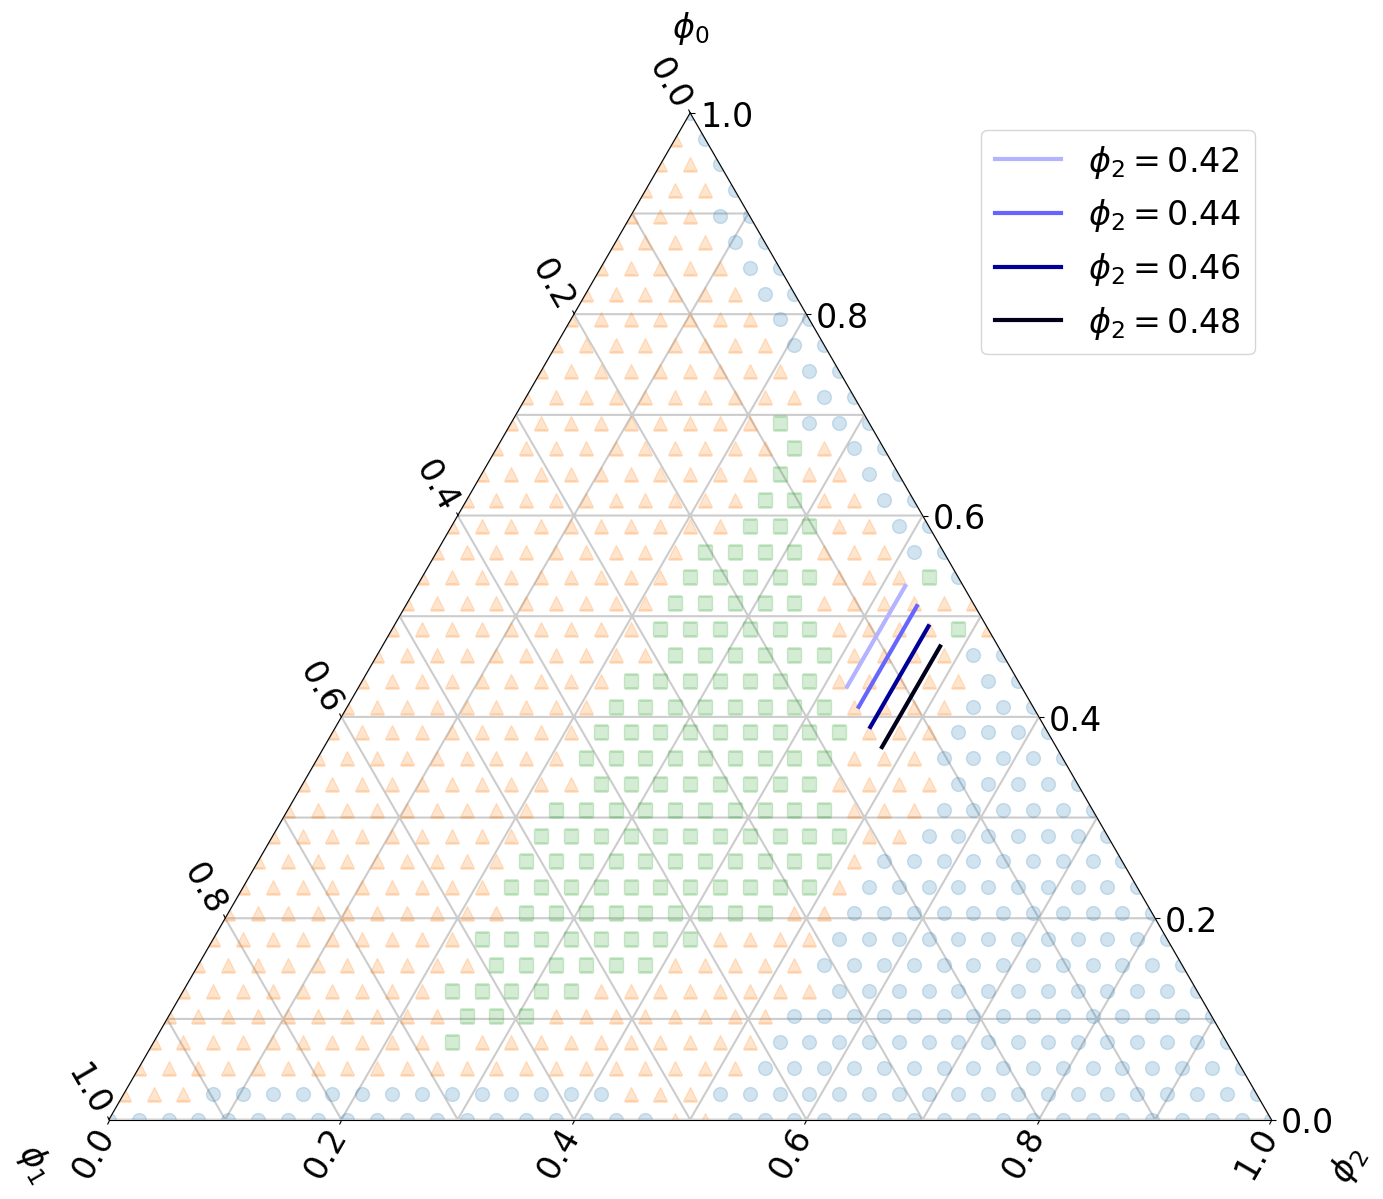

In [63]:
import os
from mpltern.datasets import get_triangular_grid
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
# plt.style.use('manuscript.mplstyle')
t, l, r = get_triangular_grid()
fontsz = 24
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(projection='ternary')

ax.taxis.set_major_locator(MultipleLocator(0.20))
ax.laxis.set_major_locator(MultipleLocator(0.20))
ax.raxis.set_major_locator(MultipleLocator(0.20))

ax.tick_params(axis='both', which='major', labelsize = fontsz)
ax.set_tlabel(r"$\phi_0$", fontsize = fontsz)
ax.set_llabel(r"$\phi_1$",fontsize = fontsz)
ax.set_rlabel(r"$\phi_2$",fontsize = fontsz)

ax.triplot(t, l, r, color='#cccccc')
color_map = {1:'C0',2:'C1',3:'C2'}
shape_map = {1:'o',2:'^',3:'s'}

# for i,phases in nPhases_to_phis.items():
#     if i == 1: lbl = "Homogeneous"
#     else: lbl = "{} Phases".format(i+1)
#     if len(phases):
#         ax.scatter(*zip(*phases),c=color_map[i],label = lbl,marker=shape_map[i],s=100)
# ax.legend(loc='upper right',fontsize = fontsz)

for i in range(1,4):
    if i == 1: lbl = "Homogeneous"
    else: lbl = "{} Phases".format(i)
    phases = np.loadtxt('example_1/{}_phases.csv'.format(i))
    if len(phases):

        # ax.scatter(*zip(*phases),c=color_map[i],label = lbl,marker=shape_map[i],s=100)
        ax.scatter(*zip(*phases),c=color_map[i],marker=shape_map[i],alpha = 0.2,s=100)

line_color_map = {
    3: '#00001a',
    2:'#000099',
    1:'#6666ff',
    0:'#b3b3ff'}
for i, phi_h in enumerate([0.42,0.44,0.46,0.48]):
# for i, phi_h in enumerate([0.1,0.3,0.5,0.7]):

    vals = [0.05,0.15]
    a = []
    b = []
    c = []
    for phi_in in vals:
        if (phi_in + phi_h < 1):
            phi_0 = 1 - phi_in - phi_h
            a.append(phi_0)
            b.append(phi_in)
            c.append(phi_h)
    ax.plot(a,b,c, label = r'$\phi_2 = {:.2f}$'.format(phi_h),linewidth = 3, color = line_color_map[i])
ax.legend(loc='upper right',fontsize = fontsz)

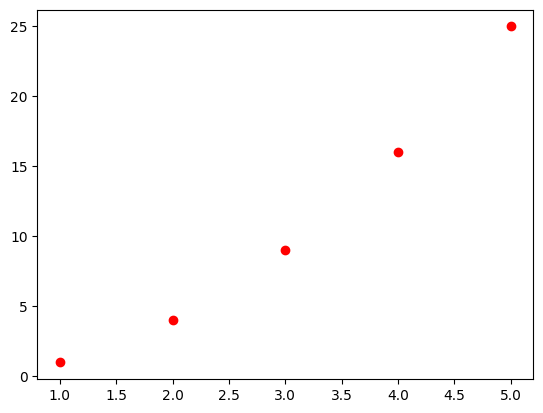

In [6]:
x=[1,2,3,4,5]
y=[1,4,9,16,25]
plt.scatter(x,y, c='r')